# Manipulación de datos (preprocesamiento)

## Descargar dataset y vista general

Descargaremos un dataset con el fin de posteriormente mostrar operaciones de manipulación de datos sobre el. En este caso el dataset se corresponde con datos sobre el cancer de mama, obtenido de la propia librería de scikit-learn.

Para más información, puedes consultar la documentación del dataset en:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
# Libraries to handle data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import io
from sklearn.utils import shuffle
from sklearn.datasets import load_breast_cancer

df_train = load_breast_cancer(as_frame=True).frame


Ahora, preparamos los datos para construir nuestro modelo. Lo primero que tenemos que hacer es visualizar los datos y realizar las transformaciones pertinentes en base a un estudio previo del dataset.

In [9]:
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 1. Tratamiento de datos categóricos

En esta sección haremos uso de ejemplos sencillos pero eficaces para ver cómo tratar el tipo de datos categóricos en las bibliotecas de cálculo numérico.

Cuando hablamos de datos categóricos, tenemos que distinguir entre características ordinales y nominales.

* Las características ordinales pueden entenderse como valores categóricos que pueden clasificarse u ordenarse. Por ejemplo, la talla de las camisetas sería un rasgo ordinal, porque podemos definir un orden: XL > L > M.

* Las características nominales no implican ningún orden; por seguir con el ejemplo anterior, podríamos pensar que el color de la camiseta es un rasgo nominal, ya que normalmente no tiene sentido decir que, por ejemplo, el color rojo es mayor que el azul.



### Codificación de datos categóricos con Pandas

Antes de nada, crearemos un DataFrame para ilustrar el problema y las diferentes soluciones.

In [31]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 1.9, 'class2'],
    ['red', 'XL', 18.7, 'class1'],
    ['blue', 'L', 15.3, 'class1'],
    ['green', 'XL', 20.0, 'class1'],
    ['blue', 'M', 15.3, 'class2'],
    ['red', 'S', 31.9, 'class2'],
    ['green', 'L', 22.9, 'class1'],
    ['blue', 'M', 11.1, 'class2'],
    ['red', 'M', 23.2, 'class1'],
])

df.columns = ['color', 'size', 'price', 'classlabel']

df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,1.9,class2
3,red,XL,18.7,class1
4,blue,L,15.3,class1
5,green,XL,20.0,class1
6,blue,M,15.3,class2
7,red,S,31.9,class2
8,green,L,22.9,class1
9,blue,M,11.1,class2


Como se puede ver en el anterior DataFrame:

* *color* es una característica nominal
* *size* es una característica ordinal
* *price* es una característica numérica

#### Codificación de características ordinales

Para asegurarnos de que los algoritmos de aprendizaje interpretan correctamente las características ordinales, tenemos que convertir los valores categóricos de cadena en enteros. Para ello lo haremos de forma manual definiendo un mapeo.

In [24]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1,
    'S': 0
}

df['size'] = df['size'].map(size_mapping)


#¡OJO! hemos visto que la 7 aparece como NaN, ¿por qué?

In [25]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,1.9,class2
3,red,3,18.7,class1
4,blue,2,15.3,class1
5,green,3,20.0,class1
6,blue,1,15.3,class2
7,red,0,31.9,class2
8,green,2,22.9,class1
9,blue,1,11.1,class2


#### Codificación de etiquetas de clase

Muchas bibliotecas de aprendizaje automático requieren que las etiquetas de clase se codifiquen como valores enteros. Aunque la mayoría de los estimadores para la clasificación en Scikit-learn convierten las etiquetas de clase en enteros interamente, se considera una buena práctica proporcionar las etiquetas de clase como matrices de enteros para evitar problemas técnicos.

Para codificar etiquetas de clase, podemos utilizar un enfoque similar al mapeo de características ordinales visto anteriormente. Aunque debemos recordar que las etiquetas de clase no son ordinales, y que no importa qué numero entero asignemos a una eriqueta de cadena concreta. Por lo tanto, podemos enumerar las etiquetas de clase, empezando por el 0.

In [26]:
class_mapping = {}

categorias = df['classlabel'].unique()
for i in range(0,len(categorias)):
    class_mapping[categorias[i]] = i
print(class_mapping)

{'class2': 0, 'class1': 1}


In [29]:

class_mapping =pd.Series(range(0,len(df['classlabel'].unique())),index=df['classlabel'].unique())
print(class_mapping.to_dict())


{'class2': 0, 'class1': 1}


Posteriormente, se puede utilizar el diccionario para realizar el mapeo

In [30]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,1.9,0
3,red,3,18.7,1
4,blue,2,15.3,1
5,green,3,20.0,1
6,blue,1,15.3,0
7,red,0,31.9,0
8,green,2,22.9,1
9,blue,1,11.1,0


Una aleternativa utilizando Scikit-learn es utilizar la clase LabelEncoder

In [50]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
class_le.fit(df['classlabel'].values)
y = class_le.transform(df['classlabel'].values)
df['classlabel'] = y


In [51]:
df

,color,size,price,classlabel
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,1.9,1
3,red,XL,18.7,0
4,blue,L,15.3,0
5,green,XL,20.0,0
6,blue,M,15.3,1
7,red,S,31.9,1
8,green,L,22.9,0
9,blue,M,11.1,1


Hay que tener en cuenta que el método fit_transform es un atajo para llamar a fit y transform por separado. Podemos utilizar el método *inverse_transform* para transformar de nuevo las etiquetas de clase en enteros y volver a su representación original de cadena.

In [52]:
df['classlabel'] = class_le.inverse_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,1.9,class2
3,red,XL,18.7,class1
4,blue,L,15.3,class1
5,green,XL,20.0,class1
6,blue,M,15.3,class2
7,red,S,31.9,class2
8,green,L,22.9,class1
9,blue,M,11.1,class2


#### Codificación one-hot de características nominales

En la codificación de características ordinales hemos visto como a través de un mapeo podemos transformar en númericas esas características. Para la codificación de características nominales podríamos hacer exactamente lo mismo; sin embargo, cometeríamos uno de lso errores más frecuentes al tratar con datos categóricos.

Los modelos de clasificación ordinales asumirán que un valor categórico (por ejemplo, green) es más grande que otro (por ejemplo, blue). Aunque esta suposición es incorrecta, un clasificador podría seguir genreando resultados útiles. Sin embargo, esos resultados no serían óptimos.

Una solución frecuentemente empleada para resolver este problema es utilizar una técnica llamada **one-hot encoding**. La idea principal es crear una nueva característica ficticia para cada valor único en la columna de características nominales. En este caso convertiríamos la característica *color* en tres nuevas características: *blue*, *green*, y *red*. Los valores binarios pueden utilizarse para indicar el color particular de un ejemplo.

Para realizar esta trasformación podemos hacerlo creando una función como la que sigue:

In [39]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 1.9, 'class2'],
    ['red', 'XL', 18.7, 'class1'],
    ['blue', 'L', 15.3, 'class1'],
    ['green', 'XL', 20.0, 'class1'],
    ['blue', 'M', 15.3, 'class2'],
    ['red', 'S', 31.9, 'class2'],
    ['green', 'L', 22.9, 'class1'],
    ['blue', 'M', 11.1, 'class2'],
    ['red', 'M', 23.2, 'class1'],
])

df.columns = ['color', 'size', 'price', 'classlabel']

df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,1.9,class2
3,red,XL,18.7,class1
4,blue,L,15.3,class1
5,green,XL,20.0,class1
6,blue,M,15.3,class2
7,red,S,31.9,class2
8,green,L,22.9,class1
9,blue,M,11.1,class2


In [28]:
dummies = pd.get_dummies(df['color'], prefix='color', dtype='int')
df = pd.concat([df, dummies], axis=1)
df.drop('color', axis=1, inplace=True)

,size,price,classlabel,color_blue,color_green,color_red
0,M,10.1,class2,0,1,0
1,L,13.5,class1,0,0,1
2,XL,1.9,class2,1,0,0
3,XL,18.7,class1,0,0,1
4,L,15.3,class1,1,0,0
5,XL,20.0,class1,0,1,0
6,M,15.3,class2,1,0,0
7,S,31.9,class2,0,0,1
8,L,22.9,class1,0,1,0
9,M,11.1,class2,1,0,0


In [13]:
#con esta función puedo convertir en numérica una columna categórica
def onehot_encode(df, column):

    #obtengo como dataframe la conversión a numéricas
    dummies = pd.get_dummies(df[column], prefix=column, dtype='int') #

    df = pd.concat([df, dummies], axis=1) #concateno lo obtenido al anterior dataframe
    df = df.drop(column, axis=1)          #elimino la columna categórica
    return df


df = onehot_encode(df, column='color')
df.head()

,size,price,classlabel,color_blue,color_green,color_red
0,M,10.1,class2,0,1,0
1,L,13.5,class1,0,0,1
2,XL,1.9,class2,1,0,0
3,XL,18.7,class1,0,0,1
4,L,15.3,class1,1,0,0


#### Codificación de características numéricas

Las características numéricas son valores que por regla general ya pueden ser utilizados por los algoritmos de aprendizaje automático; sin embargo, es posible requerir su transformación a tipos categóricos.

Básicamente, lo que haremos crear diferentes conjuntos y posteriormente definir si ese dato corresponde al conjunto o no. Como ejemplo, vamos a realizar cuatro subgrupos utilizando los valores del precio, y posteriormente clasificaremos cada ocurrencia.

In [40]:
min_value= df['price'].min()
max_value= df['price'].max()

labels = ['bajo', 'medio', 'alto','muy alto']
bins = np.linspace(min_value,max_value, len(labels)+1)

df['price_categorical'] = pd.cut(df['price'],
                                       bins=bins,
                                       labels=labels,
                                       include_lowest=True)
df.drop('price', axis=1, inplace=True)

In [41]:
df

,color,size,classlabel,price_categorical
0,green,M,class2,2
1,red,L,class1,2
2,blue,XL,class2,1
3,red,XL,class1,3
4,blue,L,class1,2
5,green,XL,class1,3
6,blue,M,class2,2
7,red,S,class2,4
8,green,L,class1,3
9,blue,M,class2,2


Posteriormente, esta nueva característica ordinal se podría convertir en categórica utilizando un mapeo como el definido anteriormente.

In [ ]:
price_mapping = {
    'bajo': 1,
    'medio': 2,
    'alto': 3,
    'muy alto': 4
}

df['price_categorical'] = df['price_categorical'].map(price_mapping)
df

,size,classlabel,blue,green,red,price_categorical
0,1.0,1,0,1,0,2
1,2.0,0,0,0,1,2
2,3.0,1,1,0,0,1
3,3.0,0,0,0,1,3
4,2.0,0,1,0,0,2
5,3.0,0,0,1,0,3
6,1.0,1,1,0,0,2
7,NaN,1,0,0,1,4
8,2.0,0,0,1,0,3
9,1.0,1,1,0,0,2


## 2. Balanceamiento del número de ocurrencias

In [64]:
#vuelvo a descargar el dataset de cancer de mama
df_train = load_breast_cancer(as_frame=True).frame

Antes de comenzar a procesar los datos de entrenamiento, veamos si los datos están o no balanceados. Esto es realmente importante, dado que si hay un número considerable de una salida frente a otra, el resultado de la predicción probablemente será erróneo.

In [65]:
print(f"Numero de occurrencias NO: {len(df_train[df_train.target==0])}")
print(f"Numero de occurrencias SI: {len(df_train[df_train.target==1])}")

Numero de occurrencias NO: 212
Numero de occurrencias SI: 357


In [46]:
#alternativa
df_train['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Class 0: 212
Class 1: 357
Proportion: 0.59 : 1


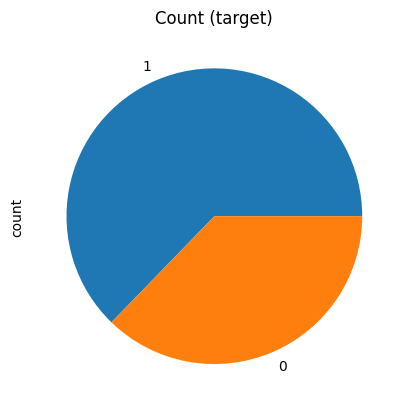

In [50]:
target_count = df_train['target'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='pie', title='Count (target)');


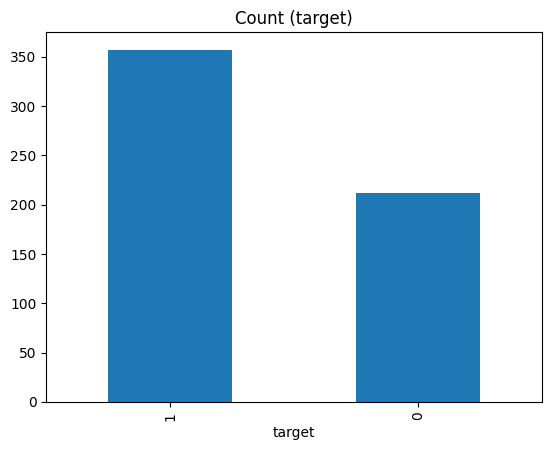

In [51]:
target_count.plot(kind='bar', title='Count (target)');

Una de las formas de hacer resampling es eliminar ocurrencias de la clase que más tenga.

In [63]:
from sklearn.utils import resample

# Split data into two dataframes because data is not balanced
df_minority = df_train[df_train.target==0] #cuando el tren SI es cancelado
df_majority = df_train[df_train.target==1] #cuando el tren NO es cancelado


df_minority_upsampled = resample(df_minority,
                                 n_samples=len(df_majority),
                                 replace=True,      # sample with replacement
                                 random_state=1)   # reproducible results

# Combino la clase minoritaria con el resultado del resampling
df_train = pd.concat([df_majority, df_minority_upsampled])

# Compruebo el resultado
print(f"Numero de occurrencias clase 1: {len(df_train[df_train.target==0])}")
print(f"Numero de occurrencias clase 2: {len(df_train[df_train.target==1])}")

Numero de occurrencias clase 1: 357
Numero de occurrencias clase 2: 357


En vez de añadir nuevas ocurrencias, puedo eliminar ocurrencias para balancear.

In [66]:
from sklearn.utils import resample

# Split data into two dataframes because data is not balanced
df_minority = df_train[df_train.target==0] #cuando el tren SI es cancelado
df_majority = df_train[df_train.target==1] #cuando el tren NO es cancelado


df_majority_downsampled = resample(df_majority,
                                 n_samples=len(df_minority),
                                 replace=True,      # sample with replacement
                                 random_state=1)   # reproducible results

# Combino la clase minoritaria con el resultado del resampling
df_train = pd.concat([df_minority, df_majority_downsampled])

# Compruebo el resultado
print(f"Numero de occurrencias clase 1: {len(df_train[df_train.target==0])}")
print(f"Numero de occurrencias clase 2: {len(df_train[df_train.target==1])}")

Numero de occurrencias clase 1: 212
Numero de occurrencias clase 2: 212


Una de las formas de hacer resampling es añadir ocurrencias a la clase que menos tenga.

## 3. Identificar columnas con muchos valores nulos


In [119]:
## Carga del fichero en Python
df_train = pd.read_csv('bookings.csv', delimiter=',')

In [69]:
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [71]:
df_train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [79]:
def print_percentage_null_values(df):
    cols_with_missing = df.isnull().sum()
    print(cols_with_missing[cols_with_missing > 0]/len(df)*100)

print_percentage_null_values(df_train)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


## 4. Completar valores NaN con un valor específico

In [83]:
df_train.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


Es importante destacar dos atributos: method y value. Comenzaremos por la explicación de method, el cual puede tener los siguientes valores:

*   pad or ffill. Utiliza la última observación válida.
*   backfill or bfill. Utiliza la anterior observacion válida.


In [ ]:
df_train.fillna(method="pad", inplace=True)

Si en values incluimos un diccionario, podemos indicar por cada columna el valor con el que queremos completar los valores NaN.

In [84]:
values = {"lead_time": df_train['lead_time'].mean(), "stays_in_weekend_nights": 0}
df_train.fillna(value=values)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## 5. Aplicar un filtro

In [103]:
#Elimino aquellas ocurrencias que children, adults y babies son 0 al mismo tiempo.
filter = (df_train['children'] == 0) & (df_train['adults'] == 0) & (df_train['babies'] == 0)
df_train = df_train[~filter]



## 6. Creación y eliminación de columnas

### 6.1 Crear una nueva columna como combinación de otras

In [104]:
  #La columna nueva se llamará total_nights y será la suma de stays_in_weekend_nights y stays_in_week_nights
  df_train['total_nights'] = df_train['stays_in_weekend_nights'] + df_train['stays_in_week_nights']

In [105]:
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


### 6.2 Eliminar una columna

In [106]:
df_train.drop("stays_in_week_nights", axis = 1, inplace = True)
df_train.drop("stays_in_weekend_nights", axis = 1, inplace = True)


In [131]:
df_train

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 6.3. Filtrar lista de columnas

In [132]:
df_train[['lead_time','is_canceled']]

,lead_time,is_canceled
0,342,0
1,737,0
2,7,0
3,13,0
4,14,0
...,...,...
119385,23,0
119386,102,0
119387,34,0
119388,109,0


## 7. Identificar variables categoricas y numéricas

In [108]:
df_train.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list              

In [114]:
#se busca aquellas cuyo dtypes sea object, esas serán las variables categóricas
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)

print("Variables categoricas", categorical)
print("Variables NO categoricas", numerical)

Variables categoricas ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Variables NO categoricas ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights']


In [117]:
#por cada columna categorica aplico one-hot
#con esta función puedo convertir en numérica una columna categórica
def onehot_encode(df, column):

    #obtengo como dataframe la conversión a numéricas
    dummies = pd.get_dummies(df[column], prefix=column, dtype='int') #

    df = pd.concat([df, dummies], axis=1) #concateno lo obtenido al anterior dataframe
    df = df.drop(column, axis=1)          #elimino la columna categórica
    return df


In [123]:
print(f'columnas antes: {len(df_train.columns)}')

for col in categorical:
    df_train = onehot_encode(df_train, column=col)

print(f'columnas despues: {len(df_train.columns)}')

columnas antes: 32
columnas despues: 1187


## 8. Las características deben estar en la misma escala

In [3]:
df_train = pd.read_csv('bookings.csv', delimiter=',')

La mayoría de los algoritmos de aprendizaje automático que vamos a ver se comportan mucho mejor si las características están en la misma escala.

Hay dos enfoques clásicos para expresar las diferentes características en la misma escala: **normalización** y **estandarización**. Estos términos se utilizan a menudo de forma bastante imprecisa en diferentes campos, y su significado debe deducirse del contexto.

### 8.1 Normalización

En la mayoría de los casos, la normalización se refiere al cambio de escala de características a un rango de [0,1], que es un caso especial de escala mínima-máxima. Para normalizar nuestros datos, podemos aplicar la escala mínima-máxima a cada columna de características donde el nuevo valor, se puede calcular como sigue:

$x^i_{norm} = \frac{x^i-x_{min}}{x_{max}-x_{min}}$

En python podemos realizar la normalización de la siguiente forma.

,lead_time,is_canceled
0,342,0
1,737,0
2,7,0
3,13,0
4,14,0
...,...,...
119385,23,0
119386,102,0
119387,34,0
119388,109,0


In [133]:
from sklearn.preprocessing import MinMaxScaler

#normalización de una columna concreta
scaler = MinMaxScaler()                                             #se normalizará al rango [0,1]
data_normalized = scaler.fit_transform(df_train[['lead_time']])     #el array contendrá las columnas a normalizar
df_train['lead_time'] = data_normalized
df_train['lead_time'].describe()

count    119390.000000
mean          0.141128
std           0.144997
min           0.000000
25%           0.024423
50%           0.093623
75%           0.217096
max           1.000000
Name: lead_time, dtype: float64

En el caso de querer normalizar el dataset completo se podría hacer con el siguiente código. ¡OJO! en este caso no funcionará porque existen atributos categóricos (no numéricos).

```python
from sklearn.preprocessing import MinMaxScaler

#se normalizará al rango [0,1]
scaler = MinMaxScaler()       
#has tenido que transformar antes las variables categóricas a numéricas
data_normalized = scaler.fit_transform(df_train)                        
df_train = pd.DataFrame(data_normalized, columns= df_train.columns)
```

### 8.2 Estandarización

Aunque la normalización a través del mínimo y el máximo es una técinca que se utiliza frecuentemente y que es útil cuando necesitamos valores que se encuentren en un intervalo actoado, la estandarización puede ser más práctica para muchos algoritmos de aprendizaje automático. Cuando utilizamos estandarización centramos las columnas de características en la **media 0 con desviación estándar 1** para que tenga los mismos parámetros que una distribución normal estándar. Sin embargo, es importante destacar que la estandarización conserva información util sobre valores atípicos y hace que el algoritmo sea menos sensible a ellos, en contraste con el escalado de mínimo y máximo. El procedimiento de estandarización puede expresarse de la siguiente forma:

$x^i_{std} = \frac{x^i-media_x}{desviacion_x}$

En python podemos realizar la estandarización de la siguiente forma.

In [135]:
from sklearn.preprocessing import StandardScaler

#normalización de una columna concreta
scaler = StandardScaler()                                             #se normalizará al rango [0,1]
data_std = scaler.fit_transform(df_train[['lead_time']])     #el array contendrá las columnas a normalizar
df_train['lead_time'] = data_std
df_train['lead_time'].describe() # se puede ver la media aproximadamente 0 y std aproximadamente 1

count    1.193900e+05
mean     6.094277e-17
std      1.000004e+00
min     -9.733187e-01
25%     -8.048782e-01
50%     -3.276301e-01
75%      5.239303e-01
max      5.923385e+00
Name: lead_time, dtype: float64

## 8.3 Pequeña comparativa entre estandarización y normalización con mínimo y máximo

El siguiente código muestra la diferencia entre las dos técnicas de escalado de características más utilizadas, la normalización y la estandarización, en un sencillo conjunto de datos de ejemplo compuesto por números del 0 al 5.

In [137]:
ex = np.array([0,1,2,3,4,5])

print('standarized:', (ex - ex.mean()) / ex.std())
print('normailzed:', (ex - ex.min()) / (ex.max()-ex.min()))

standarized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normailzed: [0.  0.2 0.4 0.6 0.8 1. ]


## 9. División del dataset

Una forma práctica de dividir aleatoriamente este conjunto de datos en conjuntos de datos de prueba y de entrenamiento separados es utilizar la función `train_test_split` del submódulo `model_selection` de Scikit-learn:

In [16]:
from sklearn.model_selection import train_test_split

#descargo los datos
y = df_train['is_canceled'] #columna de clasificación
X = df_train.drop('is_canceled', axis=1) #resto de columnas

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, #utilizaremos un 80% para entrenamiento
                                                    shuffle=True,
                                                    random_state=1)

Utilizando el mismo dataset, dividelo en 3 grupos: entrenamiento, test y validacion. Entrenamiento será el 80%, test el 10% y validacion el otro 10%.

In [19]:
from sklearn.model_selection import train_test_split

#descargo los datos
y = df_train['is_canceled'] #columna de clasificación
X = df_train.drop('is_canceled', axis=1) #resto de columnas

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y,
                                                    train_size=0.8, #utilizaremos un 80% para entrenamiento
                                                    shuffle=True

X_test, X_val, y_test, y_val = train_test_split(X_test_val,y_test_val,
                                                    train_size=0.5,
                                                    shuffle=True,
                                                    random_state=1)

In [25]:
print(f'Dataset completo: {len(df_train)}')
print(f'X_train: {len(X_train)} == {len(df_train)*0.8}')
print(f'y_train: {len(y_train)} == {len(df_train)*0.8}')

print(f'X_test: {len(X_test)} == {len(df_train)*0.1}')
print(f'y_test: {len(y_test)} == {len(df_train)*0.1}')

print(f'X_val: {len(X_val)} == {len(df_train)*0.1}')
print(f'y_val: {len(y_val)} == {len(df_train)*0.1}')

print(f'Total: {len(X_train)+len(X_test)+len(X_val)}')


Dataset completo: 119390
X_train: 95512 == 95512.0
y_train: 95512 == 95512.0
X_test: 11939 == 11939.0
y_test: 11939 == 11939.0
X_val: 11939 == 11939.0
y_val: 11939 == 11939.0
Total: 119390
